<a href="https://colab.research.google.com/github/GraceTsai33/AB-Testeing/blob/main/AB_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data is from 90,189 players that installed the game while the AB-test was running. The variables are:

*userid - a unique number that identifies each player.

*version - whether the player was put in the control group (gate_30 - a gate at level 30) or the test group (gate_40 - a gate at level 40).

*sum_gamerounds - the number of game rounds played by the player during the first week after installation

*retention_1 - did the player come back and play 1 day after installing?

*retention_7 - did the player come back and play 7 days after installing?

When a player installed the game, he or she was randomly assigned to either gate_30 or gate_40.

In [ ]:
import pandas as pd
url = ''
df = pd.read_csv(url,index_col=0,parse_dates=[0])

In [4]:
from google.colab import files
uploaded = files.upload()

Saving cookie_cats.csv to cookie_cats (1).csv


In [5]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['cookie_cats.csv']))

In [3]:
df.shape

(90189, 5)

In [4]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [6]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


In [7]:
df['version'].value_counts()

gate_40    45489
gate_30    44700
Name: version, dtype: int64

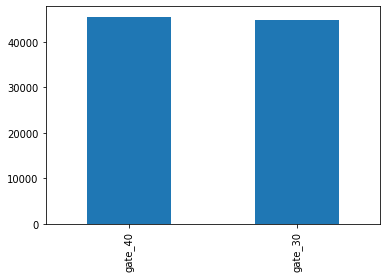

In [8]:
gate30_and_gate_40 = df['version'].value_counts()
gate30_and_gate_40.plot.bar()

In [9]:
df.nunique()

userid            90189
version               2
sum_gamerounds      942
retention_1           2
retention_7           2
dtype: int64

In [11]:
df.groupby('version')[['sum_gamerounds']].mean()

,sum_gamerounds
version,
gate_30,52.456264
gate_40,51.298776


In [41]:
gate_30_back_1_day = df[(df.version == "gate_30") & (df.retention_1 == True)]
gate_30_back_1_day.describe()

,userid,sum_gamerounds
count,2.003400e+04,20034.000000
mean,4.987870e+06,94.411700
std,2.870076e+06,135.037697
min,3.370000e+02,0.000000
25%,2.527327e+06,22.000000
50%,4.984402e+06,48.000000
75%,7.471013e+06,111.000000
max,9.999710e+06,2961.000000


In [43]:
gate_30_back_7_days = df[(df.version == "gate_30") & (df.retention_7 == True)]
gate_30_back_7_days.describe()

,userid,sum_gamerounds
count,8.502000e+03,8502.000000
mean,4.970963e+06,165.962479
std,2.875599e+06,568.000576
min,2.218000e+03,0.000000
25%,2.504752e+06,48.000000
50%,4.956111e+06,105.000000
75%,7.439494e+06,208.000000
max,9.996935e+06,49854.000000


In [44]:
gate_40_back_1_day = df[(df.version == "gate_40") & (df.retention_1 == True)]
gate_40_back_1_day.describe()

,userid,sum_gamerounds
count,2.011900e+04,20119.000000
mean,4.992232e+06,95.381182
std,2.882852e+06,137.887256
min,3.770000e+02,0.000000
25%,2.496599e+06,21.000000
50%,4.981599e+06,49.000000
75%,7.496022e+06,112.000000
max,9.999768e+06,2640.000000


In [45]:
gate_40_back_7_days = df[(df.version == "gate_40") & (df.retention_7 == True)]
gate_40_back_7_days.describe()

,userid,sum_gamerounds
count,8.279000e+03,8279.000000
mean,4.994380e+06,165.649837
std,2.877621e+06,183.792499
min,4.880000e+02,0.000000
25%,2.498316e+06,52.000000
50%,4.994988e+06,111.000000
75%,7.461102e+06,211.000000
max,9.996093e+06,2294.000000


In [7]:
import pandas as pd
import seaborn as sns       # plotting library
import matplotlib.pyplot as plt

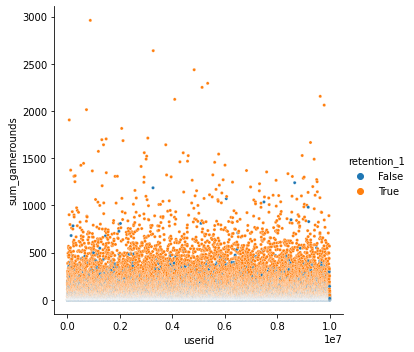

In [60]:
sns.relplot(
    data=df[df['sum_gamerounds']<10000],
    x="userid", y="sum_gamerounds", hue="retention_1", s=10
    )

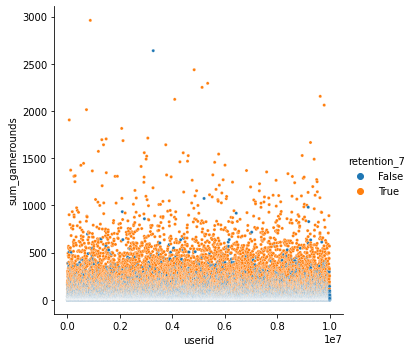

In [61]:
sns.relplot(
    data=df[df['sum_gamerounds']<10000],
    x="userid", y="sum_gamerounds", hue="retention_7", s=10
    )

In [ ]:
### not working

g=sns.violinplot(
    data=df[df['sum_gamerounds']<10000],
    x="userid", y="sum_gamerounds",
    s=10
    )
g.set(  yscale="log")

KeyboardInterrupt: ignored

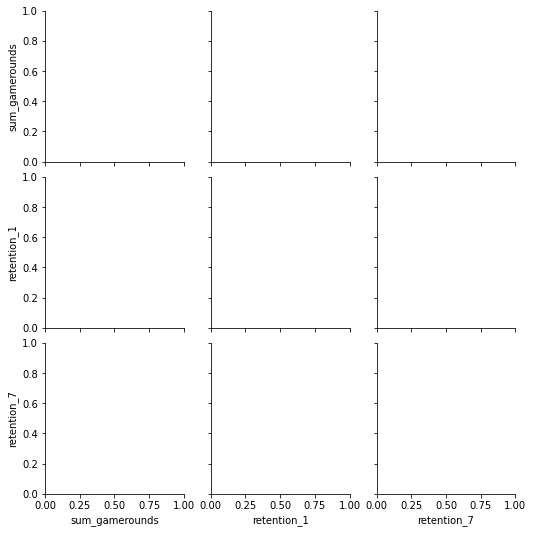

In [9]:
### not working

sns.pairplot(df, hue="userid")

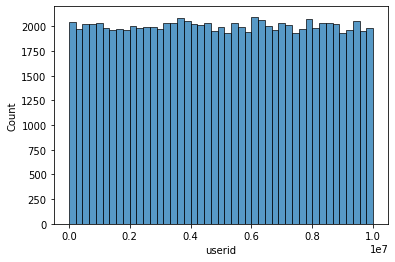

In [8]:
sns.histplot(
    data=df,
    x="userid"
    )